In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = "/content/drive/MyDrive/taxi_fare_datasets/taxi_fare.csv"
data = pd.read_csv(csv_path)

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
# missing values
print(data.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


In [ ]:
#duplicated values
print(data.duplicated().sum())

0


In [ ]:
print(data.shape)

(50000, 8)


In [ ]:
print(data.columns)

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')



2. EDA

In [ ]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
import calendar
import pandas as pd
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])
data['Date'] = data['date_time_of_pickup'].dt.day
data['Month'] = data['date_time_of_pickup'].apply(lambda x:x.month)
data['Year'] = data['date_time_of_pickup'].apply(lambda x:x.year)
data['Hour'] = data['date_time_of_pickup'].apply(lambda x:x.hour)
data['Weekday'] = data['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour,Weekday
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,Monday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,Tuesday


In [ ]:
data.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
Date                                  int64
Month                                 int64
Year                                  int64
Hour                                  int64
Weekday                              object
dtype: object

In [ ]:
data['Weekday'].value_counts()

Friday       7668
Saturday     7630
Thursday     7406
Wednesday    7212
Tuesday      6927
Monday       6639
Sunday       6518
Name: Weekday, dtype: int64

In [ ]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,6.273300,2011.739260,13.489080
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,3.461157,1.862639,6.506935
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,3.000000,2010.000000,9.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,6.000000,2012.000000,14.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,9.000000,2013.000000,19.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,12.000000,2015.000000,23.000000


In [ ]:
data = data.drop(data[data["amount"]<0].index, axis=0)
data.shape

(49994, 13)

In [ ]:
#Also remove the row where fare amount is zero
data = data.drop(data[data["amount"]<1].index, axis=0)
data.shape

(49990, 13)

In [ ]:
##make sure there is no negative values in the fare_amount variable column
data["amount"].min()

2.5

In [ ]:
data = data.drop((data[data['latitude_of_pickup']<-90]).index, axis=0)
data = data.drop((data[data['latitude_of_pickup']>90]).index, axis=0)

In [ ]:
data[data['longitude_of_pickup']<-180]
data[data['longitude_of_pickup']>180]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour,Weekday


In [ ]:

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r



data['distance'] = data.apply(lambda row: haversine(row['longitude_of_pickup'], row['latitude_of_pickup'], row['longitude_of_dropoff'], row['latitude_of_dropoff']), axis=1)

<Axes: xlabel='distance'>

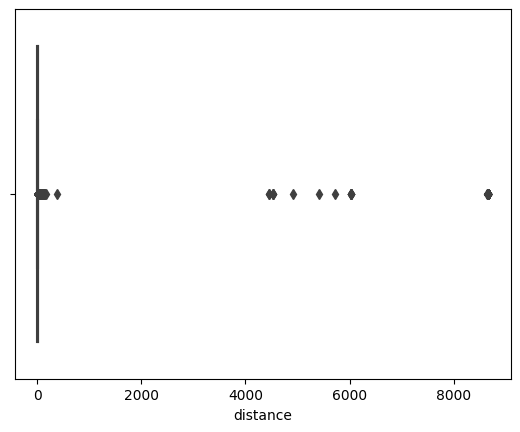

In [ ]:
sns.boxplot(x='distance',data=data)

In [ ]:
# we will remove the rows whose distance value is zero

data = data.drop(data[data['distance']== 0].index, axis=0)
data.shape

(48540, 14)

In [ ]:
#we will remove the rows whose distance values is very high which is more than 129kms
data = data.drop(data[data['distance'] > 130 ].index, axis=0)
data.shape

(48446, 14)

<Axes: xlabel='distance'>

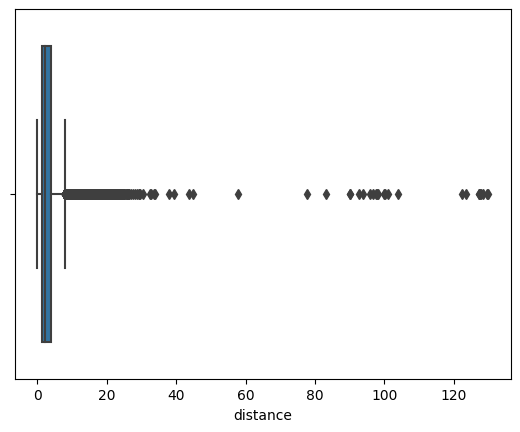

In [ ]:
sns.boxplot(x='distance',data=data)

Text(0.5, 1.0, ' Dist of passenger count')

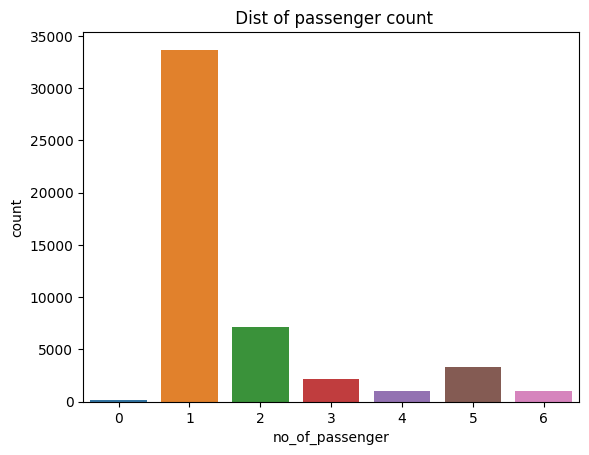

In [ ]:
ax = sns.countplot(x = data['no_of_passenger'])
plt.title(' Dist of passenger count')

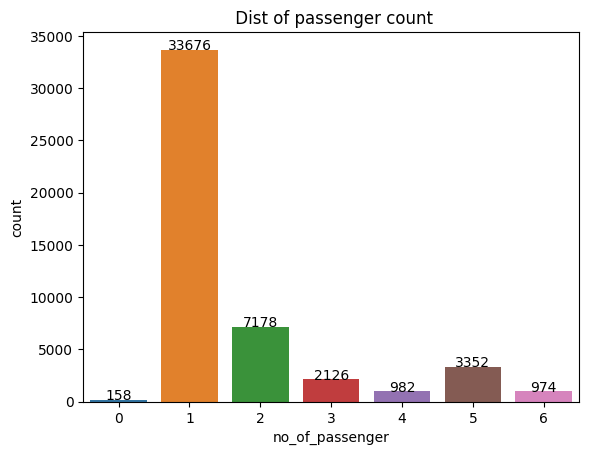

In [ ]:
ax = sns.countplot(x = data['no_of_passenger'])
plt.title(' Dist of passenger count')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

In [ ]:
data.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'Date', 'Month', 'Year', 'Hour', 'Weekday',
       'distance'],
      dtype='object')

Text(0.5, 1.0, ' no of pickups done on each day of the week')

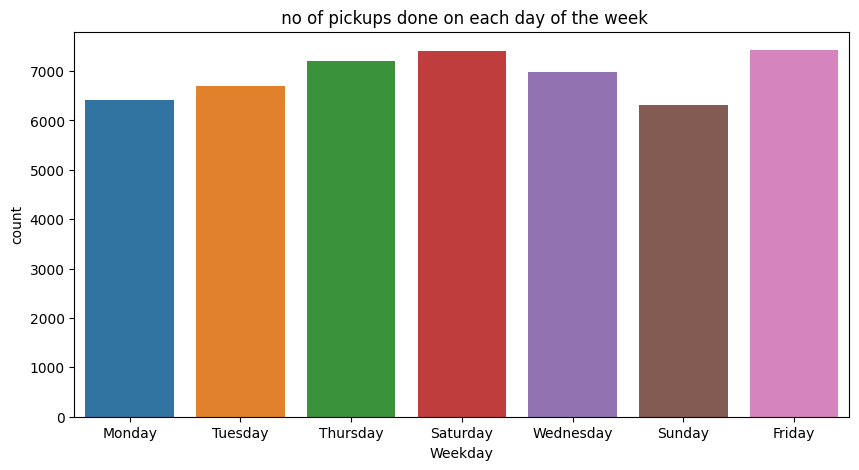

In [ ]:
figure, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Weekday', data = data)
ax.set_title(' no of pickups done on each day of the week')
#plt.tight_layout()

In [ ]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_data = sorted(data.Weekday, key=lambda x: weekday.index(x))
set(sorted_data)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

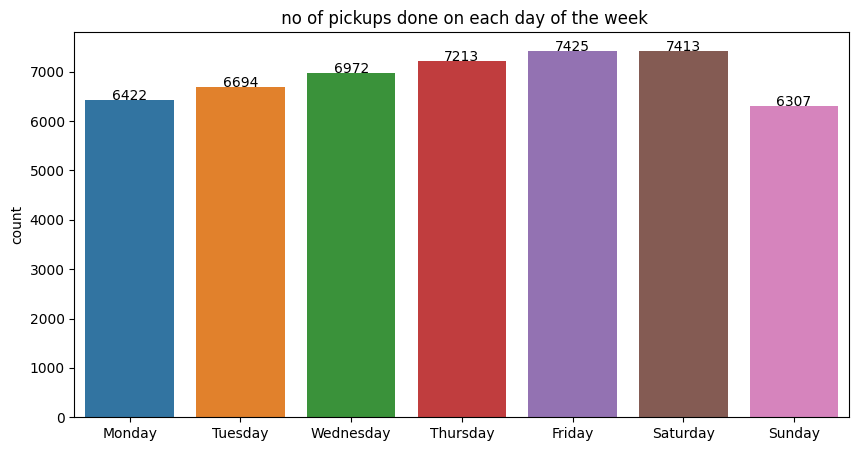

In [ ]:
figure, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = sorted_data, data = data)

ax.set_title(' no of pickups done on each day of the week')
#plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour,Weekday,distance
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,Monday,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,Tuesday,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,Thursday,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,Saturday,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,Tuesday,1.999157


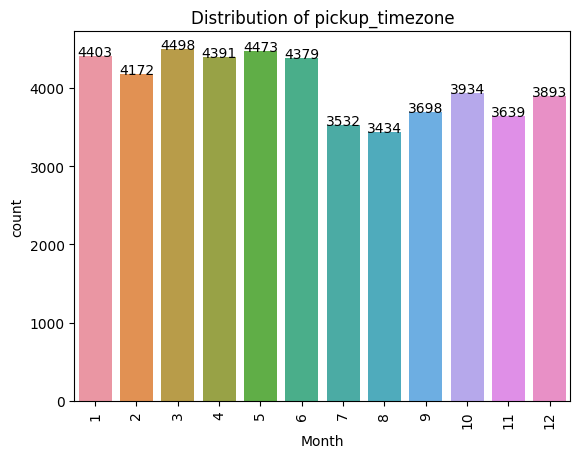

In [ ]:
ax = sns.countplot(x=data['Month']);
plt.title('Distribution of pickup_timezone')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')
plt.show()

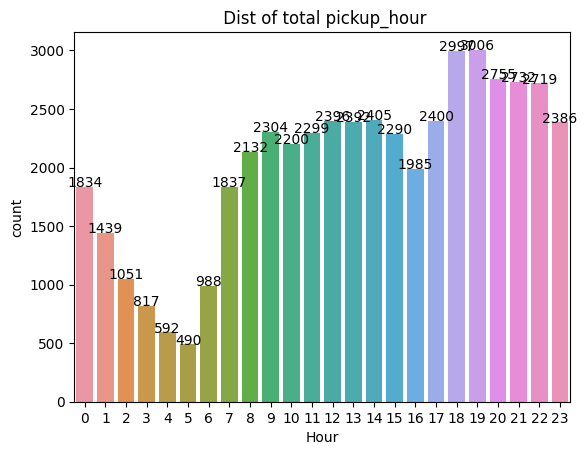

In [ ]:
ax = sns.countplot(x = data['Hour'])
plt.title(' Dist of total pickup_hour')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

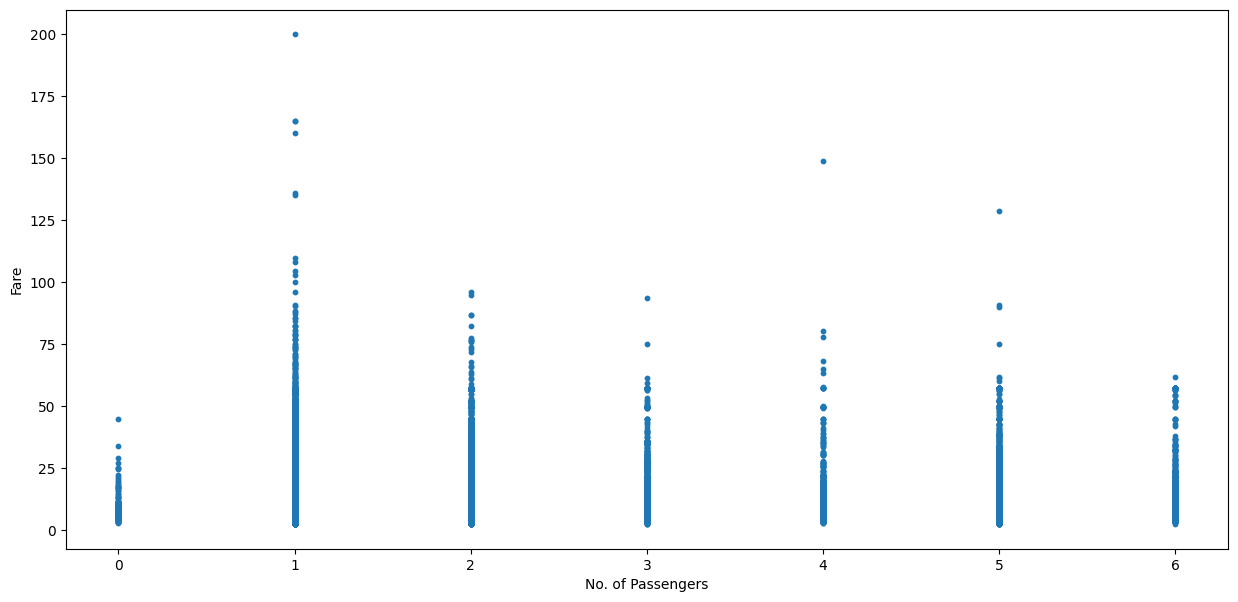

In [ ]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=data['no_of_passenger'], y=data['amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

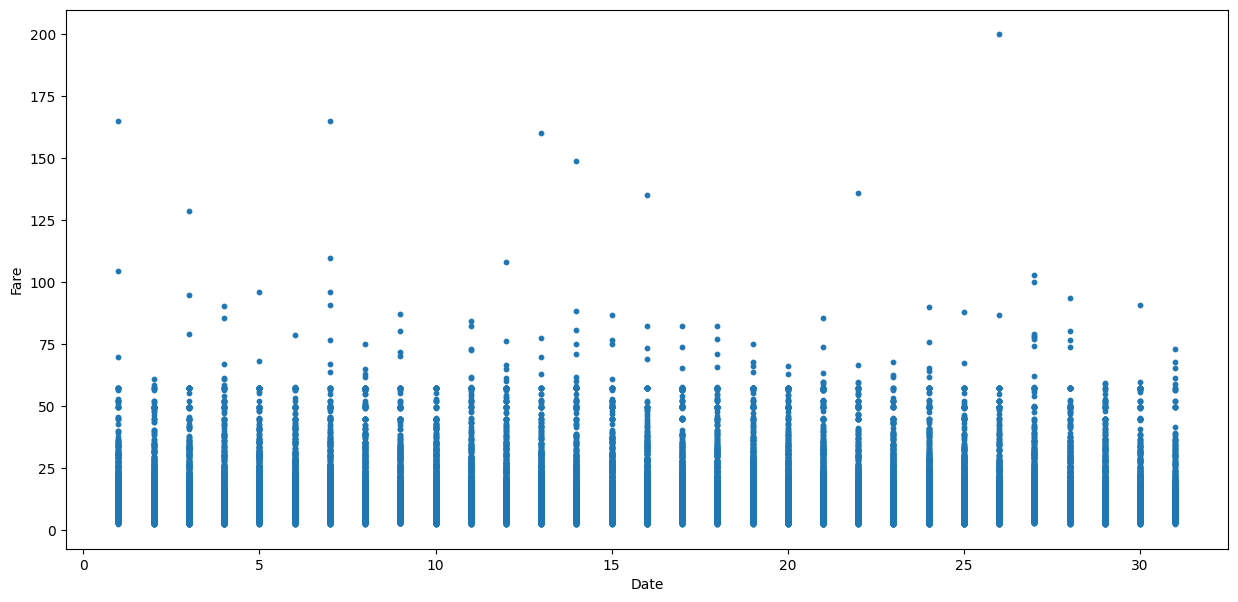

In [ ]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Date'], y=data['amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

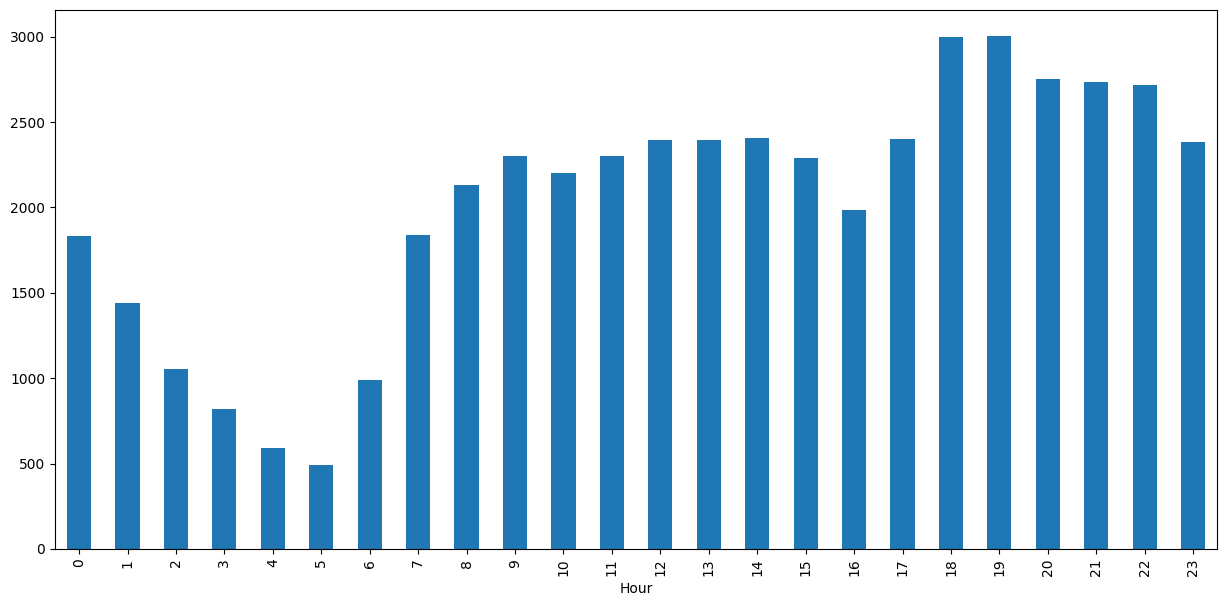

In [ ]:
plt.figure(figsize=(15,7))
data.groupby(data["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

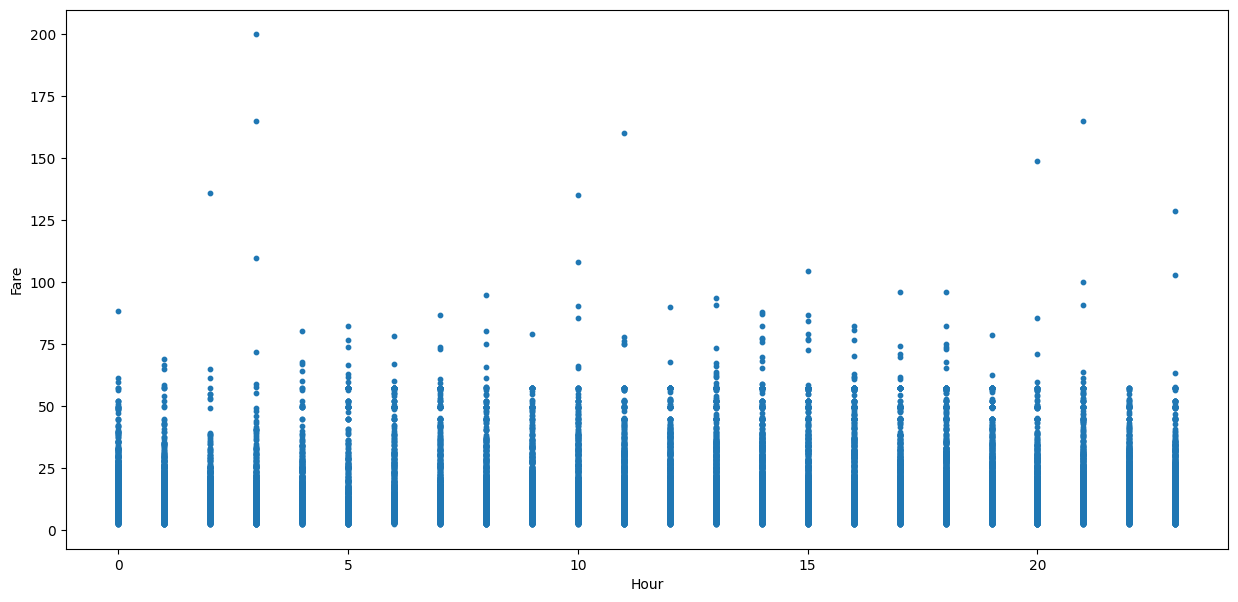

In [ ]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

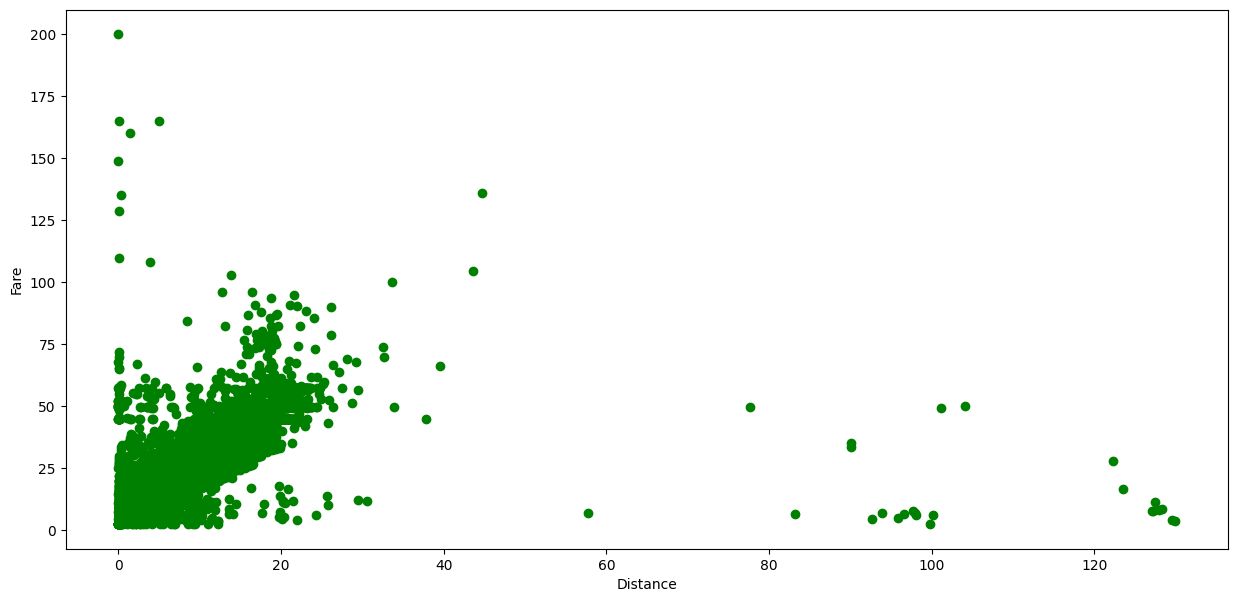

In [ ]:
#Relationship between distance and fare
plt.figure(figsize=(15,7))
plt.scatter(x = data['distance'],y = data['amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

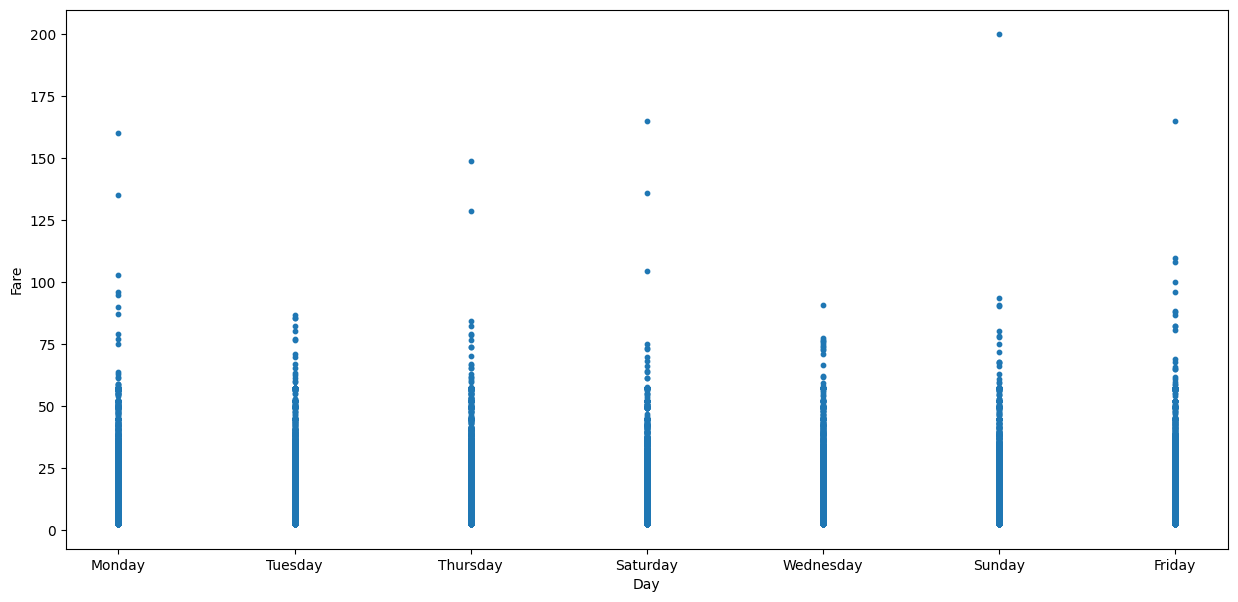

In [ ]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Weekday'], y=data['amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

amount


<ipython-input-41-c564f4a77eb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins='auto',color='green')


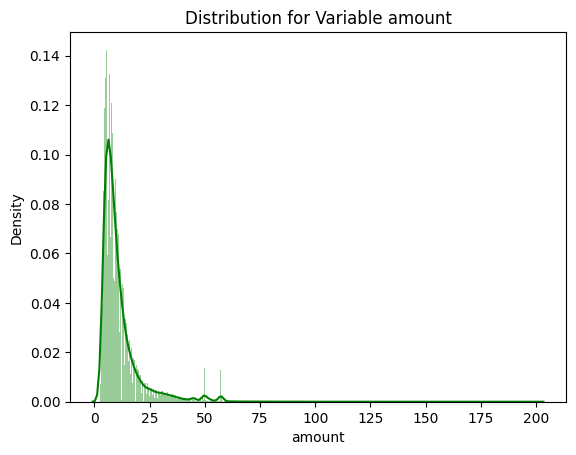

distance


<ipython-input-41-c564f4a77eb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins='auto',color='green')


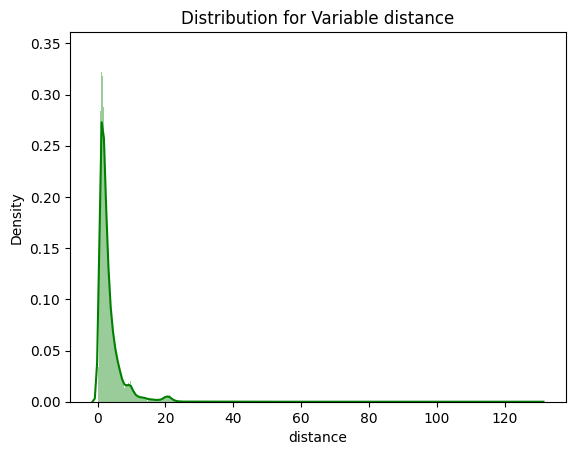

In [ ]:
#Normality check of dataing data is uniformly distributed or not-

for i in ['amount', 'distance']:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
data['amount'] = np.log1p(data['amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
data['distance'] = np.log1p(data['distance'])

amount


<ipython-input-43-f6f637b64596>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins='auto',color='green')


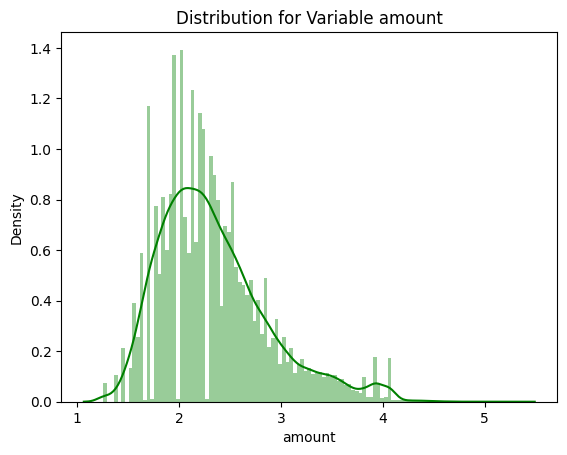

distance


<ipython-input-43-f6f637b64596>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins='auto',color='green')


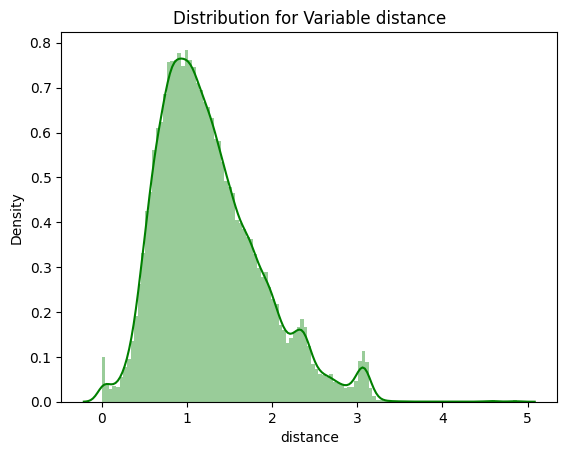

In [ ]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['amount', 'distance']:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

<ipython-input-44-01cae5d252dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="coolwarm", linewidths=.5)


<Axes: >

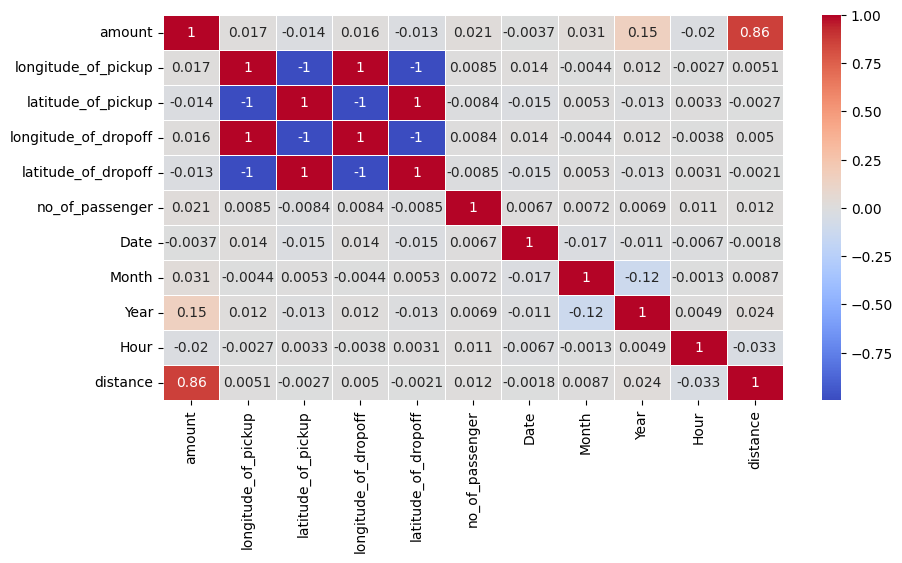

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm", linewidths=.5)

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour,Weekday,distance
0,26:21.0,1.704748,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,Monday,0.708412
1,52:16.0,2.884801,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,Tuesday,2.246029
2,35:00.0,1.902108,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,Thursday,0.871095
3,30:42.0,2.163323,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,Saturday,1.334809
4,51:00.0,1.840550,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,Tuesday,1.098331


In [ ]:
# converting categorical variable
variable = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
Year = {2009:1, 2010:2, 2011:3, 2012:4, 2013:5, 2014:6, 2015:7}
data["Weekday"] = data["Weekday"].map(variable)
data["Year"] = data["Year"].map(Year)

In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Date,Month,Year,Hour,Weekday,distance
0,26:21.0,1.704748,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,1,17,1,0.708412
1,52:16.0,2.884801,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2,16,2,2.246029
2,35:00.0,1.902108,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,3,0,4,0.871095
3,30:42.0,2.163323,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,6,1.334809
4,51:00.0,1.840550,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2,7,2,1.098331


In [ ]:
data.drop(["unique_id","date_time_of_pickup","longitude_of_pickup","latitude_of_pickup",'longitude_of_dropoff','latitude_of_dropoff'], axis=1, inplace= True)

In [ ]:
data.head()

,amount,no_of_passenger,Date,Month,Year,Hour,Weekday,distance
0,1.704748,1,15,6,1,17,1,0.708412
1,2.884801,1,5,1,2,16,2,2.246029
2,1.902108,2,18,8,3,0,4,0.871095
3,2.163323,1,21,4,4,4,6,1.334809
4,1.840550,1,9,3,2,7,2,1.098331


In [ ]:
data.shape

(48446, 8)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['amount'], axis=1)
y = data[['amount']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38756, 7)
X_test shape: (9690, 7)
y_train shape: (38756, 1)
y_test shape: (9690, 1)


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import HuberRegressor

def apply_regression_models(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'Gradient Boosting Regression': GradientBoostingRegressor(),
        'AdaBoost Regression': AdaBoostRegressor(),
        'XGBoost Regression': xgb.XGBRegressor(),
        'LightGBM Regression': lgb.LGBMRegressor(),
        'CatBoost Regression': CatBoostRegressor(iterations=1000, verbose=0)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

        results.append({'Model': name, 'MSE': mse,'RMSE':rmse, 'R2 Score': r2,"Adj r2": adj_r2})

    return pd.DataFrame(results)

In [ ]:
apply_regression_models(X_train, y_train, X_test, y_test)

<ipython-input-53-fca1f2f27229>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 38756, number of used features: 7
[LightGBM] [Info] Start training from score 2.336611


,Model,MSE,RMSE,R2 Score,Adj r2
0,Linear Regression,0.067050,0.258940,0.772919,0.772755
1,Ridge Regression,0.067050,0.258940,0.772919,0.772755
2,Lasso Regression,0.295300,0.543415,-0.000109,-0.000832
3,ElasticNet Regression,0.295300,0.543415,-0.000109,-0.000832
4,Decision Tree Regression,0.114249,0.338008,0.613066,0.612786
5,Random Forest Regression,0.056693,0.238104,0.807993,0.807855
6,Gradient Boosting Regression,0.052597,0.229341,0.821866,0.821737
7,AdaBoost Regression,0.115826,0.340332,0.607725,0.607441
8,XGBoost Regression,0.057051,0.238854,0.806782,0.806642
9,LightGBM Regression,0.051367,0.226643,0.826033,0.825907


In [ ]:
X = X.reset_index()
y = y.reset_index()

In [ ]:
X.drop(columns = ['index'],inplace = True)
y.drop(columns = ['index'],inplace = True)

In [ ]:
X

,no_of_passenger,Date,Month,Year,Hour,Weekday,distance
0,1,15,6,1,17,1,0.708412
1,1,5,1,2,16,2,2.246029
2,2,18,8,3,0,4,0.871095
3,1,21,4,4,4,6,1.334809
4,1,9,3,2,7,2,1.098331
...,...,...,...,...,...,...,...
48441,1,13,10,4,19,6,1.191094
48442,1,12,6,5,23,3,1.781772
48443,1,22,6,7,17,1,0.628452
48444,1,30,1,3,4,7,1.182735


# Optimizing the results with parameters tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
##Random Hyperparameter Grid


from sklearn.model_selection import train_test_split,RandomizedSearchCV


##Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,200,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 129, 'max_depth': 65}
R-squared = 0.81.
RMSE =  0.23718093413305535


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = RandomizedSearchCV(gb, param_distributions = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'n_estimators': 19, 'max_depth': 5}
R-squared = 0.8.
RMSE =  0.24291562715279444


In [ ]:
# for best parameters of Random Forest
fit_RF = RandomForestRegressor(n_estimators = 129,max_depth=65).fit(X_train,y_train)

#prediction on data data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))
## calculate R^2 for train data
print(r2_score(y_train, pred_train_RF),'r2 score train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_RF),'r2 score for test data')

<ipython-input-64-2c065ad75577>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_RF = RandomForestRegressor(n_estimators = 129,max_depth=65).fit(X_train,y_train)


Root Mean Squared Error For training data = 0.09057123283950216
Root Mean Squared Error For Test data = 0.23746742732906537
0.9723211167612329 r2 score train data
0.8090181874701088 r2 score for test data


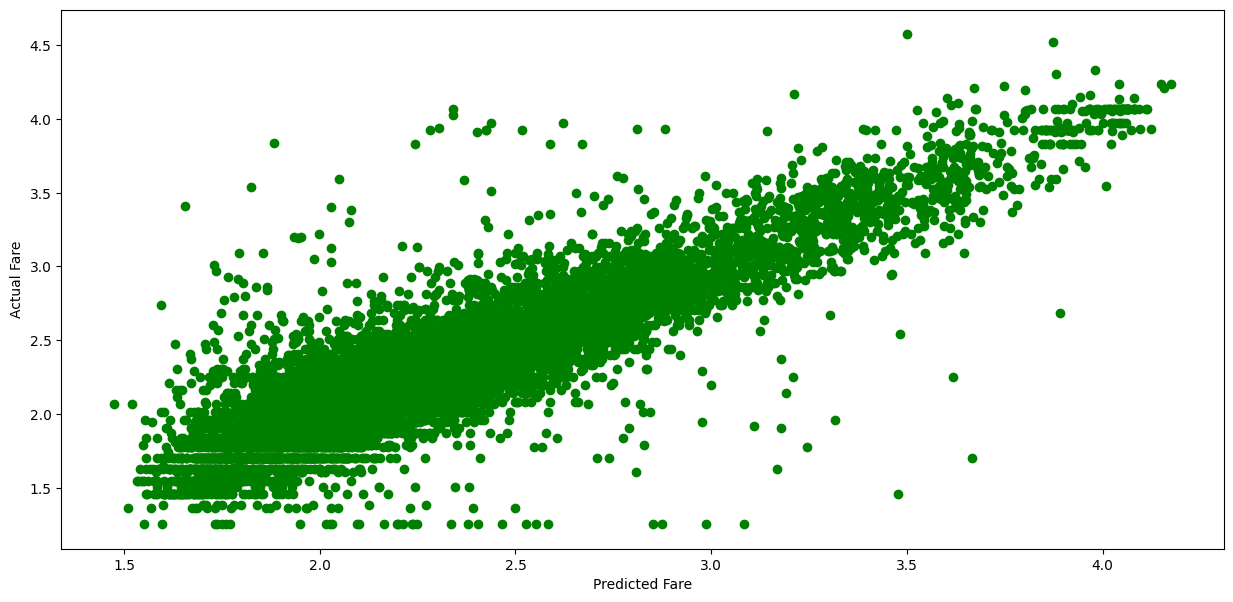

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x = pred_test_RF,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

In [ ]:
# for best parameters GradientBoostingRegressor
fit_GB = GradientBoostingRegressor(max_depth=7,n_estimators=19).fit(X_train, y_train)

#prediction on data data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

## calculate R^2 for train data
print(r2_score(y_train, pred_train_GB),'r2 score train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_GB),'r2 score for test data')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error For training data = 0.23270895008662096
Root Mean Squared Error For Test data = 0.24142160527895115
0.8172765954555641 r2 score train data
0.8026049840230265 r2 score for test data


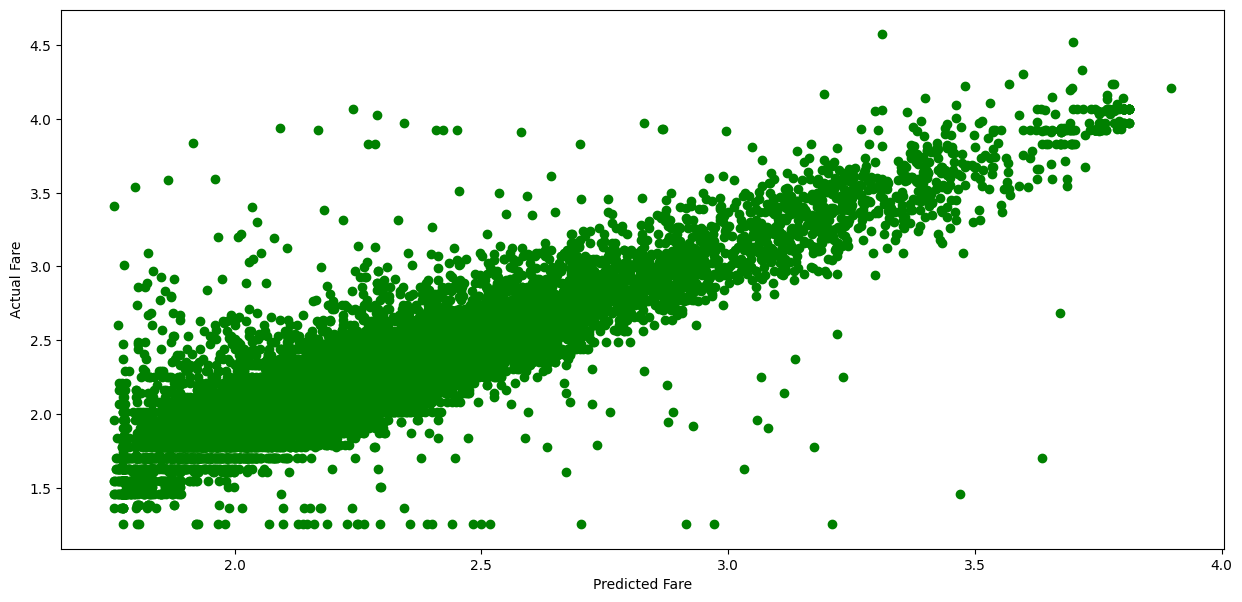

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x = pred_test_GB,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()